# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/441B/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
df_select=df[['trans_date_trans_time','category','amt','city_pop']]

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [7]:
df_select['trans_date_trans_time']=pd.to_datetime(df_select['trans_date_trans_time'])

<ipython-input-7-9ba00a5dfdf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['trans_date_trans_time']=pd.to_datetime(df_select['trans_date_trans_time'])


In [8]:
# Convert factor variable to n-1 dummies
dummies=pd.get_dummies(df_select['category'], drop_first=True)
mergedf=pd.concat([dummies,df_select],axis=1)

In [9]:
df_select=mergedf.drop('category',axis=1)

In [10]:
# Convert trans_date_trans_time to dummies
df_select['hour']=[i.hour for i in df_select['trans_date_trans_time']]
df_select['morning']=np.where(df_select['hour']<=5,1,0)
df_select['evening']=np.where(df_select['hour']>=18,1,0)
df_select=df_select.drop('hour',axis=1)

# Define predicted variable
y=df['is_fraud']

In [11]:
df_select=df_select.drop('trans_date_trans_time',axis=1)

In [12]:
# Split data into training and testing data
x_train, x_test, y_train, y_test=train_test_split(df_select,y,test_size=0.3,random_state=90)

# Scale predictors based on training data
scaler=preprocessing.StandardScaler().fit(x_train)
x_train_scale=scaler.transform(x_train)
x_test_scale=scaler.transform(x_test)

In [13]:
col=x_train.columns

In [14]:
df_x_train_scale=pd.DataFrame(x_train_scale,columns=col)
df_x_train_scale

,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,morning,evening
0,-0.275886,2.969946,-0.190321,-0.322718,-0.264888,-0.322324,-0.309942,-0.228382,-0.257458,-0.27664,-0.285210,-0.313095,-0.179687,0.163902,-0.288142,-0.493377,-0.660714
1,-0.275886,-0.336706,-0.190321,-0.322718,-0.264888,-0.322324,3.226410,-0.228382,-0.257458,-0.27664,-0.285210,-0.313095,-0.179687,-0.061082,-0.288142,-0.493377,1.513514
2,-0.275886,-0.336706,-0.190321,-0.322718,-0.264888,-0.322324,-0.309942,-0.228382,-0.257458,-0.27664,-0.285210,3.193916,-0.179687,-0.394254,-0.292863,2.026847,-0.660714
3,-0.275886,-0.336706,-0.190321,-0.322718,-0.264888,-0.322324,-0.309942,-0.228382,-0.257458,-0.27664,3.506186,-0.313095,-0.179687,-0.421751,-0.233780,-0.493377,1.513514
4,-0.275886,2.969946,-0.190321,-0.322718,-0.264888,-0.322324,-0.309942,-0.228382,-0.257458,-0.27664,-0.285210,-0.313095,-0.179687,0.067214,-0.285420,-0.493377,-0.660714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388998,-0.275886,-0.336706,-0.190321,-0.322718,-0.264888,-0.322324,-0.309942,4.378621,-0.257458,-0.27664,-0.285210,-0.313095,-0.179687,-0.432287,-0.259971,-0.493377,-0.660714
388999,-0.275886,-0.336706,-0.190321,3.098685,-0.264888,-0.322324,-0.309942,-0.228382,-0.257458,-0.27664,-0.285210,-0.313095,-0.179687,0.421715,-0.291958,-0.493377,-0.660714
389000,-0.275886,-0.336706,-0.190321,-0.322718,-0.264888,-0.322324,-0.309942,-0.228382,-0.257458,-0.27664,-0.285210,-0.313095,-0.179687,-0.134514,-0.293199,-0.493377,1.513514
389001,-0.275886,-0.336706,-0.190321,-0.322718,-0.264888,-0.322324,-0.309942,-0.228382,3.884130,-0.27664,-0.285210,-0.313095,-0.179687,-0.372476,-0.274930,2.026847,-0.660714


# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [15]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [16]:
from pandas.core.common import random_state
ros=RandomOverSampler(random_state=100)
over_x,over_y=ros.fit_resample(df_x_train_scale,y_train)

rus=RandomUnderSampler(random_state=100)
under_x,under_y=rus.fit_resample(df_x_train_scale,y_train)

smote=SMOTE()
smote_x,smote_y=smote.fit_resample(df_x_train_scale,y_train)

# 3.) Train three logistic regression models 

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
rosmodel=LogisticRegression().fit(over_x,over_y)

In [19]:
rusmodel=LogisticRegression().fit(under_x,under_y)

In [20]:
smotemodel=LogisticRegression().fit(smote_x,smote_y)

# 4.) Test the three models

In [21]:
# Define threshold
t=0.1

In [22]:
# Use Sensitivity and specificity to evaluate 3 models
rospred=rosmodel.predict_proba(x_test)[:,1]>t
df_select['rosTP']=(rospred==1)&(y_test==1)
print('Sensitivity is '+str(df_select['rosTP'].sum()/(y_test==1).sum()))

df_select['rosTN']=(rospred==0)&((y_test==0))
print('Specificity is '+str(df_select['rosTN'].sum()/(y_test==0).sum()))

Sensitivity is 0.44716692189892804
Specificity is 0.8381818948230491


In [23]:
ruspred=rusmodel.predict_proba(x_test)[:,1]>t
df_select['rusTP']=(ruspred==1)&(y_test==1)
print('Sensitivity is '+str(df_select['rusTP'].sum()/(y_test==1).sum()))

df_select['rusTN']=(ruspred==0)&(y_test==0)
print('Specificity is '+str(df_select['rusTN'].sum()/(y_test==0).sum()))

Sensitivity is 0.445635528330781
Specificity is 0.8396391730849135


In [24]:
smotepred=smotemodel.predict_proba(x_test)[:,1]>t
df_select['smoteTP']=(smotepred==1)&(y_test==1)
print('Sensitivity is '+str(df_select['smoteTP'].sum()/(y_test==1).sum()))

df_select['smoteTN']=(smotepred==0)&(y_test==1)
print('Specificity is '+str(df_select['smoteTN'].sum()/(y_test==1).sum()))

Sensitivity is 0.3981623277182236
Specificity is 0.6018376722817764


# 5.) Which performed best in Out of Sample metrics?

It is more important to have a higher sensitivity for credit company because it wants to avoid false negatives as many as possible. Using sensitivity as the primary evaluting metric, random over sampling model outperforms random under sampling and smote model.

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [25]:
import matplotlib.pyplot as plt

In [26]:
df_train_scale=pd.concat([df_x_train_scale,y_train],axis=1)

df_smote=pd.concat([smote_x,smote_y],axis=1)

   food_dining  gas_transport  grocery_net  grocery_pos  health_fitness  \
0    -0.275886       2.969946    -0.190321    -0.322718       -0.264888   
1    -0.275886      -0.336706    -0.190321    -0.322718       -0.264888   
2    -0.275886      -0.336706    -0.190321    -0.322718       -0.264888   
3    -0.275886      -0.336706    -0.190321    -0.322718       -0.264888   
4    -0.275886       2.969946    -0.190321    -0.322718       -0.264888   

       home  kids_pets  misc_net  misc_pos  personal_care  shopping_net  \
0 -0.322324  -0.309942 -0.228382 -0.257458       -0.27664     -0.285210   
1 -0.322324   3.226410 -0.228382 -0.257458       -0.27664     -0.285210   
2 -0.322324  -0.309942 -0.228382 -0.257458       -0.27664     -0.285210   
3 -0.322324  -0.309942 -0.228382 -0.257458       -0.27664      3.506186   
4 -0.322324  -0.309942 -0.228382 -0.257458       -0.27664     -0.285210   

   shopping_pos    travel       amt  city_pop   morning   evening  is_fraud  
0     -0.313095 -0.1

Text(0, 0.5, 'City Population')

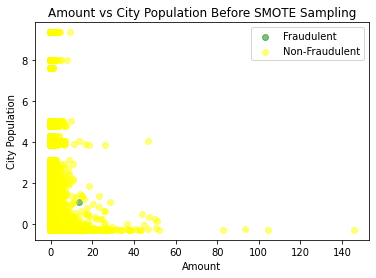

In [27]:
plt.scatter(df_train_scale[df_train_scale['is_fraud']==1]['amt'], df_train_scale[df_train_scale['is_fraud']==1]['city_pop'],color='green',alpha=0.5)
plt.scatter(df_train_scale[df_train_scale['is_fraud']==0]['amt'],df_train_scale[df_train_scale['is_fraud']==0]['city_pop'],color='yellow',alpha=0.5)
plt.legend(['Fraudulent','Non-Fraudulent'])
plt.title('Amount vs City Population Before SMOTE Sampling')
plt.xlabel('Amount')
plt.ylabel('City Population')
plt.show()

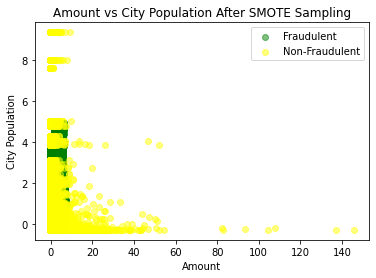

In [29]:
plt.scatter(df_smote[df_smote['is_fraud']==1]['amt'],df_smote[df_smote['is_fraud']==1]['city_pop'],color='green',alpha=.5)
plt.scatter(df_smote[df_smote['is_fraud']==0]['amt'],df_smote[df_smote['is_fraud']==0]['city_pop'],color='yellow',alpha=.5)
plt.legend(['Fraudulent','Non-Fraudulent'])
plt.title('Amount vs City Population After SMOTE Sampling')
plt.xlabel('Amount')
plt.ylabel('City Population')
plt.show()